#**Solucion numerica de ecuaciones diferenciales parciales**

**Resolviendo la Ecuación de Calor mediante Diferencias Finitas.**

El método de diferencias finitas utiliza Series de Taylor para aproximar las derivadas.

Aproximación de la primer derivada.

Si se conoce el valor de una función $f(x)$ en un punto $x_0$, se puede conocer el valor en una vecindad $x_0 + h$, con $h$ pequeño, utilzando una Serie de Taylor

$$\begin{equation*}
f(x_0+h) \approx f(x_0) + \frac{h}{1!}f'(x_0) +  \mathcal{O}(h^2)
\end{equation*}$$
de la ecuación anterior, obtenemos el valor aproximado de la primer derivada

$$\begin{equation*}
f'(x_0) \approx \frac{f(x_0 +h) - f(x_0)}{h} + \mathcal{O}(h^2)
\end{equation*}$$
El término $\mathcal{O}(h^2)$ denota términos de orden $h^2$ y superior.

Esta aproximación de la primera derivada, se le conoce como diferencias finitas de $f'(x_0)$ hacia enfrente, porque involucra un punto hacia enfrente en la derivada.

De la misma forma se obtiene el término de diferencias finitas hacia atrás

$$\begin{equation*}
f'(x_0) \approx \frac{f(x_0) - f(x_0-h)}{h} + \mathcal{O}(h^2)
\end{equation*}$$
Podemos promediar las dos ecuaciones anteriores y se obtiene una diferencia finita centrada de orden superior

$$\begin{equation*}
f'(x_0) \approx \frac{f(x_0 +h) - f(x_0 -h)}{2h} + \mathcal{O}(h^3)
\end{equation*}$$
Aproximación de la segunda derivada

Podemos utilizar esta última ecuación para calcular la aproximación de la segunda derivada

$$\begin{equation*}
f''(x_0) \approx \frac{f'(x_0 +h) - f'(x_0)}{h} + \mathcal{O}(h^2)
\end{equation*}$$
y substituimos $f(x_0 + h)$ por una diferencia finita hacia atrás

$$\begin{equation*}
f'(x_0 +h) \approx \frac{f(x_0 +h) - f(x_0)}{h} + \mathcal{O}(h^2)
\end{equation*}$$
y la derivada $f'(x_0)$ por una diferencia finita hacia atrás

$$\begin{equation*}
f'(x_0) \approx \frac{f(x_0) - f(x_0 -h)}{h} + \mathcal{O}(h^2)
\end{equation*}$$
Finalmente obtenemos la diferencia finita centrada de segundo orden para $f''(x_0)$ que involucra los valores en 3 puntos.

$$\begin{equation*}
f''(x_0) \approx \frac{f(x_0 +h) - 2 f(x_0) + f(x_0 -h)}{h^2} + \mathcal{O}(h^3)
\end{equation*}$$
Solución de la Ecuación de Calor por un método híbrido.(EDP > EDO)

Podemos escribir la ecuación del calor como

$$\begin{eqnarray*}
\frac{\partial u(x,t)}{\partial t} &amp; = &amp; \kappa \frac{\partial^2 u(x,t)}{\partial x^2} \\
 &amp; \approx &amp; \kappa \frac{u(x+h,t) - 2 u(x,t) + u(x-h,t)}{h^2} 
\end{eqnarray*}$$
y luego integrar en el tiempo como si tuviéramos una ecuación diferencial ordinaria.

Formalmente, para un determinado punto ($jh,t$), tendremos la ecuación diferencial ordinaria $u(jh,t) = u_j(t)$

$$\begin{equation*}
\frac{d u_j(t)}{dt} = 
\kappa \frac{u_{j+1}(t) - 2 u_j(t) + u_{j-1}(t)}{h^2} 
\end{equation*}$$
para la cual requerimos proporcionar la condición inicial al tiempo $t=0$

$$\begin{equation*}
u(0) = f(x)
\end{equation*}$$
Y condiciones a la frontera:

$u_0 = c_1, u_N = c_2$, para el tipo de Dirichlet

Del tipo Neumann, $du_0/dx = 0$ ó $dx_N/dx=0$, para casos de equilibrio térmico.

Condiciones a la frontera tipo Neumann

Tenemos que definir cómo estimar la derivada en la frontera, digamos en la frontera $x=L$. Recordando que estamos usando un aproximación de segundo orden para $\partial^2 u/\partial x^2$, debemos encontrar una aproximación para la primer derivada también de orden $h^2$

$$\begin{eqnarray*}
\frac{du}{dx} &amp; = &amp; \frac{u_{N+1} - u_{N-1}}{2h} = 0 \\
            u_{N+1}  &amp; = &amp; u_{N-1} \\  
\end{eqnarray*}$$
aunque formalmente $u_{N+1}$ esta "fuera" de nuestro dominio, pero utilizamos esto para determinar la ecuación que se satisface en la frontera, reemplazando $u_{N+1}   =  u_{N-1}$ en la ecuación del calor obteniendo

$$\begin{equation*}
\frac{d u_N(t)}{dt} = 
\kappa \frac{2 u_{N-1}(t) - 2 u_N(t)}{h^2} 
\end{equation*}$$


In [ ]:
# Bibliotecas 
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D #graficos 3d
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib import cm

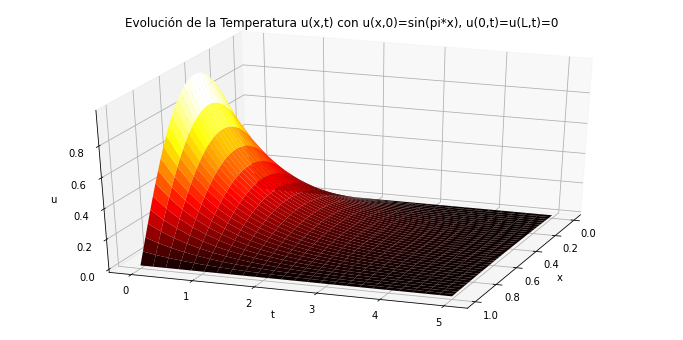

In [ ]:
# Definimos la expresión de diferencias finitas centradas de segundo orden
def odefunc(u, t):
    # Llenamos de ceros inicialmente
    dudt = np.zeros(x0.shape)

    # Condiciones a la Frontera Tipo Dirichlet: Temperatura constante
    # Condiciones a la frontera u(0,t)=u(L,t)=0 
    dudt[0] = 0
    dudt[-1] = 0 # Equivale a evaluar en el último punto N

    # Constante de difusión del calor
    kappa=0.1
    
    # Calculamos la temperatura en los puntos interiores 1 a N-1.
    for i in range(1, N-1):
        dudt[i] = kappa*(u[i + 1] - 2*u[i] + u[i - 1]) / h**2
    return dudt

# Algunos parámetros
# Intervalo en x = (a,b)
a = 0
b = 1
# Tiempo inicial y final
t0 = 0
tf = 5.0

# Número de puntos en la dirección x
N = 40
# Tamaño de delta x
h = (b-a)/(N-1)

# Contantes de diferencias finitas
#k = 0.25*h**2
#r = k/h**2;

# Los puntos en el dominio x
x = np.linspace(a, b, N);

# La condición inicial u(x,0)=sin(pi*x)
x0 = np.sin(np.pi*x)
x0[x0 < 0] = 0

# Puntos de integración en el tiempo
tspan = np.linspace(t0, tf, 25);

# Solución usando scipy.integrate.odeint
sol = odeint(odefunc, x0, tspan)

#%% Make a 3d figure
fig = plt.figure(figsize=(12,6))
ax = fig.add_subplot(111, projection='3d')

SX, ST = np.meshgrid(x, tspan)
ax.plot_surface(SX, ST, sol, cmap='hot', rstride=1, cstride=1)
ax.set_xlabel('x')
ax.set_ylabel('t')
ax.set_zlabel('u')
ax.view_init(elev=30, azim=20)
ax.set_title('Evolución de la Temperatura u(x,t) con u(x,0)=sin(pi*x), u(0,t)=u(L,t)=0')
plt.show()

**Caso a)**

* Una barra metálica de longitud $L=10$
* coeficiente de difusión $\kappa=100$.
* Condición inicial (Temperatura dentro de la barra): u(x,0) = 0.
* Condiciones a la frontera: u(0,t)=10, u(L,t)=0.

Realice los cálculos hasta alcanzar el equilibrio térmico.

r=0.004802960592118423


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:47: UserWarning: The following kwargs were not used by contour: 'lw'
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:48: UserWarning: The following kwargs were not used by contour: 'lw'


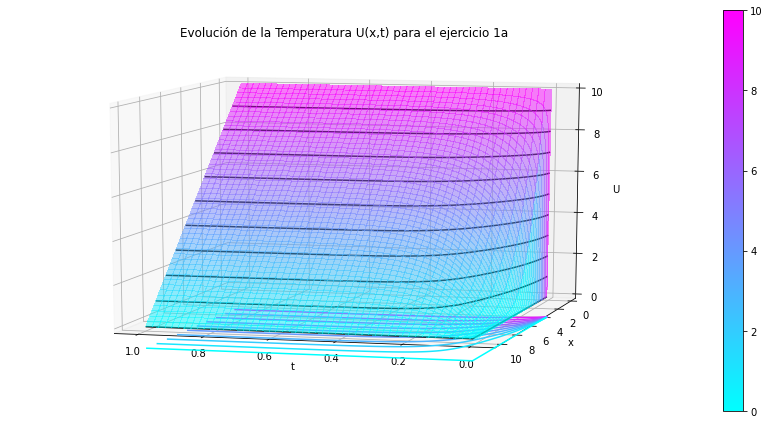

In [ ]:
# Parametros de la situación

N = 5000 # pasos en el tiempo
M = 50 # pasos en el espacio

# Longitud de la barra
x0 = 0
xf = 10
# Periodo de simulació:
t0 = 0
tf = 1
# Tamaño de paso:
dx = (xf-x0)/(M-1)
dt = (tf-t0)/(N-1)
# Constante de difusión
kappa = 100
# Puntos en el tiempo y el espacio
tspan = np.linspace(t0,tf,N)
xspan = np.linspace(x0,xf,M)

# Malla 
U = np.zeros((M,N))

#Condiciones iniciales
U[:, 0] = 0
U[0, :] = 10
U[-1, :] = 0

#parametro de la ecuación
alpha = kappa*dt/dx**2
print(f"r={dt/dx**2}" )
# Método de diferencias finitas Ec. del Calor
for k in range(0, N-1): # Avance en el tiempo
    for i in range(1, M-1): # Calcula la Temp sobre todo el dominio en x
        U[i, k+1] = alpha * U[i-1, k] + (1 - 2 * alpha) * U[i, k] + alpha * U[i + 1, k]

# Define malla para graficar
T, X = np.meshgrid(tspan, xspan)
fig = plt.figure(figsize=(18,9))

# Grafica una superficie
ax = fig.gca(projection='3d')
surf = ax.plot_surface(T, X, U, cmap='cool',
                       linewidth=0.01, antialiased=False, alpha=0.5)

# Contornos
ax.contour(T, X, U, 10, lw=1, colors="k", linestyles="solid")
ax.contour(T, X, U, 10, lw=1, cmap="cool", linestyles="solid", offset=-1)

# Grafica una tabla de valores 
m = cm.ScalarMappable(cmap='cool')
m.set_array(U)
plt.colorbar(m)

# Etiquetas de los ejes
ax.set_xlabel('t')
ax.set_ylabel('x')
ax.set_zlabel('U')
ax.set_title('Evolución de la Temperatura U(x,t) para el ejercicio 1a')

# Punto del observador 
ax.view_init(elev=10, azim=105)

plt.tight_layout()
plt.show()

dt/dx**2 0.09147212958551691


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:44: UserWarning: The following kwargs were not used by contour: 'lw'
/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:45: UserWarning: The following kwargs were not used by contour: 'lw'


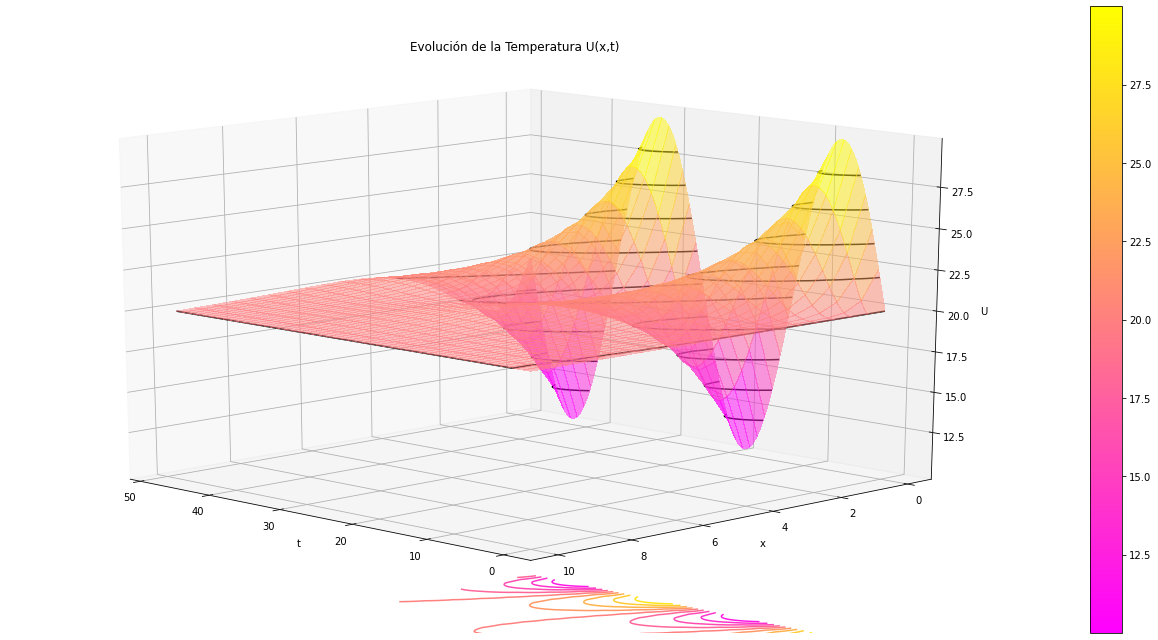

In [ ]:
#Pasos en x y en t
m=21
n=2100

#Condiciones de la barra
x0=0
xL=10

#Tiempos de integracion
t0=0
tf=48.0

#tamaño de paso
dx= (xL-x0)/(m-1)
dt= (tf-t0)/(n-1)
print("dt/dx**2", dt/dx**2)
#difusion termica
kappa=0.25

alpha=(kappa*dt)/(dx**2)
xspan= np.linspace(x0, xL, m)
tspan= np.linspace(t0, tf, n)

U = np.zeros((m, n))

U[:,0]= np.zeros(xspan.shape)+20
U[0, :] = 20 + 10*np.sin(np.pi*tspan/12)
U[-1, :] = 20.0

for k in range(0,n-1):
  for i in range(1, m-1):
    U[i, k+1]=alpha*U[i-1, k] + (1-2*alpha)*U[i,k]+alpha*U[i+1, k]

T, X = np.meshgrid(tspan, xspan)

fig = plt.figure(figsize=(18,9))

# Grafica una superficie
ax = fig.gca(projection="3d")
surf = ax.plot_surface(T, X, U, cmap="spring",
                       linewidth=0.01, antialiased=False, alpha=0.5)

# Contornos
ax.contour(T, X, U, 10, lw=1, colors="Black", linestyles="solid")
ax.contour(T, X, U, 10, lw=1, cmap="spring", linestyles="solid", offset=-1)

# Grafica una tabla de valores 
m = cm.ScalarMappable(cmap='spring')
m.set_array(U)
plt.colorbar(m)

# Etiquetas de los ejes
ax.set_xlabel("t")
ax.set_ylabel("x")
ax.set_zlabel("U")
ax.set_title("Evolución de la Temperatura U(x,t) ")
# Punto del observador 
ax.view_init(elev=15, azim=135)

plt.tight_layout()
plt.show()

dt/dx**2 < 0.5? 0.4000800160032006


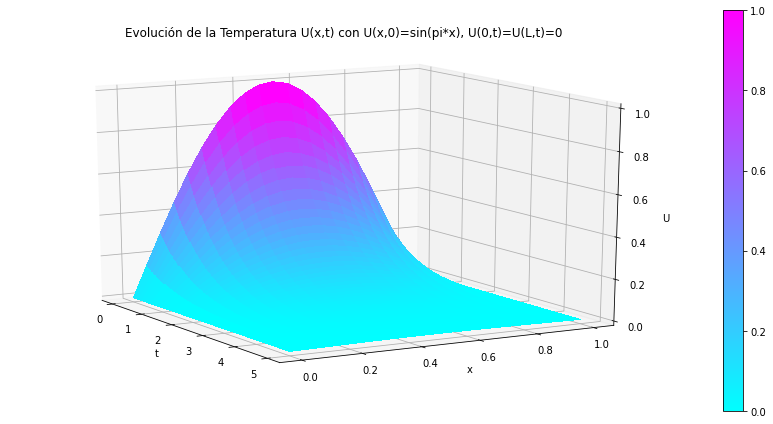

In [ ]:
# Hay que jugar con los puntos por la restricción de estabilidad y convergencia
M = 21 # Número de puntos en el eje x
N = 5000 # Número de puntos en el tiempo

x0 = 0
xL = 1 # Longitud de la barra

t0 = 0
tF = 5.0 # Tiempo final

dx = (xL - x0) / (M - 1) # tamaño discretización en x
dt = (tF - t0) / (N - 1) # tamaño de la dicretización en t
print('dt/dx**2 < 0.5?', dt/dx**2)

kappa = 0.1 # difusividad térmica

alpha = kappa * dt / dx**2 # Coeficiente en la Ecuación

# Malla (x,t) 
xspan = np.linspace(x0, xL, M)
tspan = np.linspace(t0, tF, N)

# Define el tamaño de la matrix de la solución y la inicia con ceros
U = np.zeros((M, N))

# Condición inicial
U[:, 0] = np.sin(np.pi*xspan)
#U[:,0] = np.zeros(xspan.shape)
# Condiciones a la Frontera tipo Dirichlet
U[0, :] = 0
U[-1, :] = 0

# Método de diferencias finitas Ec. del Calor
# Loops anidados
for k in range(0, N-1): # Avance en el tiempo
    for i in range(1, M-1): # Calcula la Temp sobre todo el dominio en x
        U[i, k+1] = alpha * U[i-1, k] + (1 - 2 * alpha) * U[i, k] + alpha * U[i + 1, k]

# Define malla para graficar
T, X = np.meshgrid(tspan, xspan)
fig = plt.figure(figsize=(12,6))

# Grafica una superficie
ax = fig.gca(projection='3d')
surf = ax.plot_surface(T, X, U, cmap="cool",
                       linewidth=0.01, antialiased=False)

# Grafica una tabla de valores 
m = cm.ScalarMappable(cmap="cool")
m.set_array(U)
plt.colorbar(m)

# Etiquetas de los ejes
ax.set_xlabel('t')
ax.set_ylabel('x')
ax.set_zlabel('U')
ax.set_title('Evolución de la Temperatura U(x,t) con U(x,0)=sin(pi*x), U(0,t)=U(L,t)=0')

# Punto del observador 
ax.view_init(elev=15, azim=-30)

plt.tight_layout()
plt.show()

**Problema 2**:

Variaciones de la Temperatura en el Suelo

La superficie de la Tierra recibe radiación solar durante el día. Esta Energía la transforma en calor, y cambia la temperatura dentro del suelo. Por la noche al no recibir radiación solar la emite a la atmósfera.

Si suponemos que la temperatura del suelo varía con la profundidad, podemos suponer que tenemos un problema unidimensional, siendo el eje $x$ la dirección hacia dentro del suelo.

A cierta profundidad $x=L$, suponemos que la temperatura ya no cambia, es decir $\partial u/\partial x = 0$ (Condición de Neumann).

Supondremos que la variación de la temperatura en la superficie terrestre varía como

$$\begin{equation*}
u(0,t) = u_0 + u_a \sin (\frac{2\pi t}{P})
\end{equation*}$$
donde $u_0$ es la inical temperatura promedio del suelo y $u_a$ es la temperatura del aire. La constante $P$ es el periodo de variación diaria de temperatura $P=24 h=86,400 s$.

En este caso la constante de difusión de calor es $\kappa = 1.0 \times 10^{-6}$. El tiempo será medido en segundos.

Usando la Ecuación de Calor, determina numéricamente la variación del perfil de temperatura dentro del suelo, por ejemplo para Hermosillo en estos días supongamos que $u_0=15ºC$, $u_a= 20ºC$.

**Caso a)**                  
Una barra metálica de longitud 𝐿=10 , y coeficiente de difusión 𝜅=100 .

Condición inicial (Temperatura dentro de la barra): u(x,0) = 0.

Condiciones a la frontera: u(0,t)=10, u(L,t)=0.



r=155.99099774943738


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:57: UserWarning: The following kwargs were not used by contour: 'lw'
/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:58: UserWarning: The following kwargs were not used by contour: 'lw'


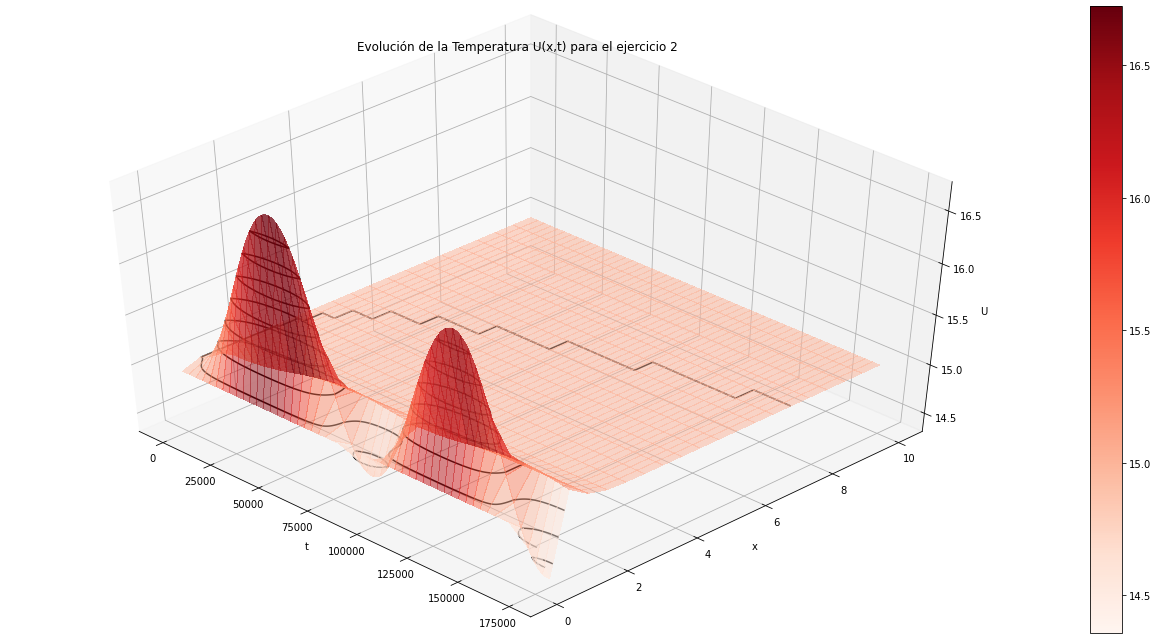

In [ ]:
#Proponemos los parametros de la situacion 
N = 4000
M = 20 

# Profundidad
x0 = 0
xf = 10

# Periodo de simulación:
t0 = 0
tf = 172800

# Definimos el tamaño de los pasos:
dx = (xf-x0)/(M-1)
dt = (tf-t0)/(N-1)

# Definimos la constante de difusión
kappa = 1*10**(-6)

# Puntos en el tiempo 
tspan = np.linspace(t0,tf,N)
xspan = np.linspace(x0,xf,M)

# Malla 
U = np.zeros((M,N))

#Condiciones iniciales
U[:, 0] = 15
#U[0, :] = 10
U[-1, :] = 15

#parametro de la ecuación
alpha = kappa*dt/dx**2
print(f"r={dt/dx**2}" )

# Parametros de las condiciones iniciales:
u_0 = 15
u_a = 20
P = 86400

# Método de diferencias finitas Ec. del Calor
for k in range(0, N-1): # Avance en el tiempo
    U[0, :] = u_0+u_a*np.sin(2*np.pi*k*dt/P)
    for i in range(1, M-1): # Calcula la Temp sobre todo el dominio en x
        U[i, k+1] = alpha * U[i-1, k] + (1 - 2 * alpha) * U[i, k] + alpha * U[i + 1, k]

# Define malla para graficar
T, X = np.meshgrid(tspan, xspan)
fig = plt.figure(figsize=(18,9))

# Grafica una superficie
ax = fig.gca(projection='3d')
surf = ax.plot_surface(T, X, U, cmap='Reds',
                       linewidth=0.01, antialiased=False, alpha=0.5)

# Contornos
ax.contour(T, X, U, 10, lw=1, colors="k", linestyles="solid")
ax.contour(T, X, U, 10, lw=1, cmap="Reds", linestyles="solid", offset=-1)

# Grafica una tabla de valores 
m = cm.ScalarMappable(cmap='Reds')
m.set_array(U)
plt.colorbar(m)

# Etiquetas de los ejes
ax.set_xlabel('t')
ax.set_ylabel('x')
ax.set_zlabel('U')
ax.set_title('Evolución de la Temperatura U(x,t) para el ejercicio 2')

# Punto del observador 
ax.view_init(elev=45, azim=-45)

plt.tight_layout()
plt.show()